In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.datasets import fashion_mnist

In [2]:
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [3]:
train_data, train_labels

(array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        ...,
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],

In [4]:
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

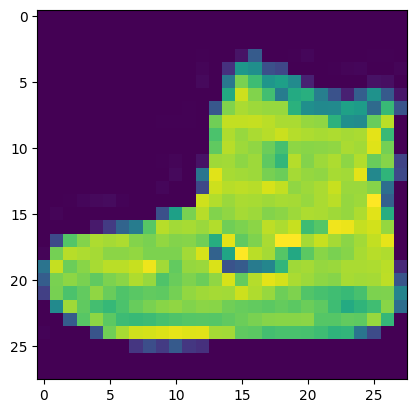

In [5]:
plt.imshow(train_data[0]);

In [6]:
train_labels[0]

9

In [7]:
class_names=['T-shirt/top','Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'sneaker', 'Bag', 'Ankle boot']

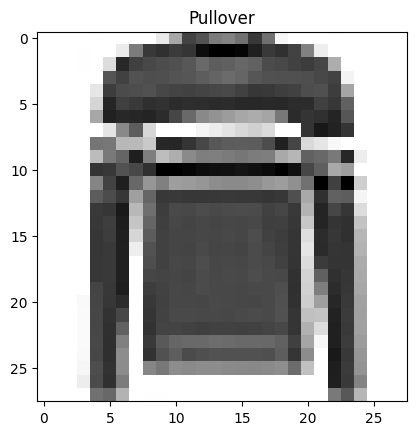

In [8]:
plt.imshow(train_data[5], cmap=plt.cm.binary)
plt.title(class_names[train_labels[5]]);

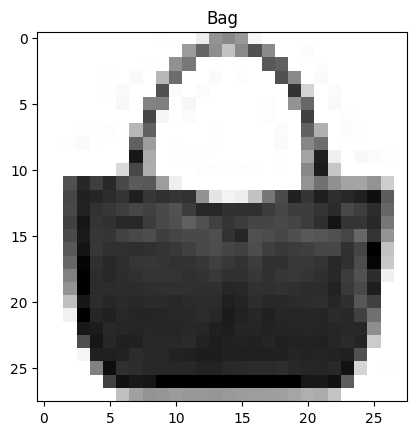

In [9]:
plt.imshow(train_data[100], cmap=plt.cm.binary)
plt.title(class_names[train_labels[100]]);

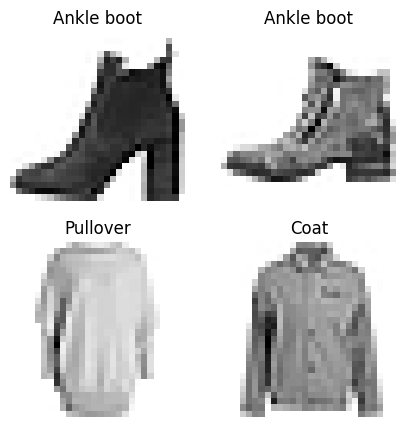

In [10]:
import random
plt.figure(figsize=(5,5))
for i in range(4):
  ax = plt.subplot(2, 2, i + 1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

In [11]:
from keras.activations import activation_layers
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_1 = model_1.fit(train_data, train_labels, epochs=10,validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 2.2949 - accuracy: 0.1156 - val_loss: 2.2290 - val_accuracy: 0.1326
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.0286 - accuracy: 0.1786 - val_loss: 1.7675 - val_accuracy: 0.2625
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7143 - accuracy: 0.2698 - val_loss: 1.6590 - val_accuracy: 0.2879
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.6506 - accuracy: 0.2857 - val_loss: 1.6450 - val_accuracy: 0.2858
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6260 - accuracy: 0.2910 - val_loss: 1.6262 - val_accuracy: 0.2951
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.6168 - accuracy: 0.2880 - val_loss: 1.6316 - val_accuracy: 0.2942
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.6067 - accuracy: 0.2935 - val_loss: 1.5956 - val_accuracy

In [12]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 4)                 3140      
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [13]:
pd.DataFrame(history_1.history)

,loss,accuracy,val_loss,val_accuracy
0,2.294924,0.115583,2.229019,0.1326
1,2.028635,0.178600,1.767521,0.2625
2,1.714338,0.269850,1.659015,0.2879
3,1.650563,0.285650,1.644967,0.2858
4,1.625983,0.291033,1.626188,0.2951
5,1.616849,0.287950,1.631553,0.2942
6,1.606697,0.293517,1.595638,0.3019
7,1.600552,0.291317,1.598038,0.2933
8,1.601270,0.292350,1.589779,0.2867
9,1.598500,0.296650,1.586970,0.2973


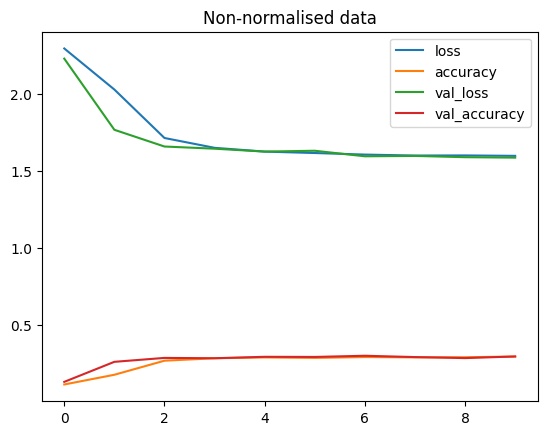

In [14]:
pd.DataFrame(history_1.history).plot(title="Non-normalised data");

### Improving by normalising the data
Neural network likes the data to be scaled or normalised

In [15]:
train_data.min(), train_data.max()

(0, 255)

In [16]:
train_data = train_data/255
test_data = test_data/255

In [17]:
train_data.min(), train_data.max()

(0.0, 1.0)

In [18]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_2 = model_2.fit(train_data, train_labels, epochs=20,validation_data=(test_data, test_labels))

Epoch 1/20
1875/1875 [==============================] - 13s 6ms/step - loss: 1.3320 - accuracy: 0.4778 - val_loss: 0.9585 - val_accuracy: 0.6291
Epoch 2/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.8827 - accuracy: 0.6540 - val_loss: 0.8518 - val_accuracy: 0.6599
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8101 - accuracy: 0.6776 - val_loss: 0.8232 - val_accuracy: 0.6788
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7751 - accuracy: 0.6956 - val_loss: 0.7861 - val_accuracy: 0.6916
Epoch 5/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.7521 - accuracy: 0.7052 - val_loss: 0.7703 - val_accuracy: 0.7029
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7329 - accuracy: 0.7160 - val_loss: 0.7571 - val_accuracy: 0.7073
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7105 - accuracy: 0.7244 - val_loss: 0.7348 - val_accuracy

In [19]:
pd.DataFrame(history_2.history)

,loss,accuracy,val_loss,val_accuracy
0,1.331952,0.477817,0.958528,0.6291
1,0.882726,0.654050,0.851811,0.6599
2,0.810081,0.677633,0.823180,0.6788
3,0.775084,0.695600,0.786149,0.6916
4,0.752088,0.705183,0.770311,0.7029
5,0.732896,0.715967,0.757124,0.7073
6,0.710513,0.724417,0.734834,0.7195
7,0.689278,0.732833,0.737496,0.7242
8,0.674605,0.741633,0.702856,0.7344
9,0.665120,0.745433,0.695446,0.7413


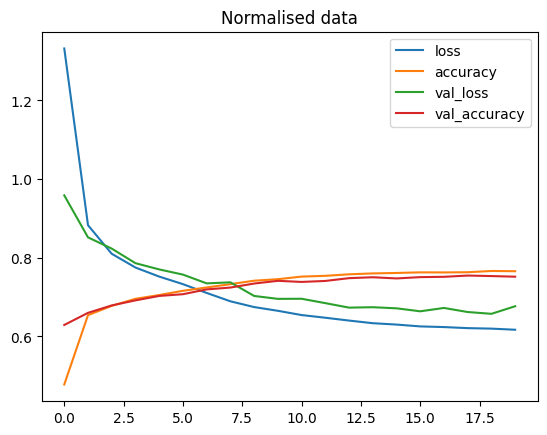

In [20]:
pd.DataFrame(history_2.history).plot(title='Normalised data');

### Find the ideal learning rate

In [24]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

history_3 = model_3.fit(train_data,
                        train_labels,
                        epochs=50,
                        validation_data=(test_data, test_labels),
                        callbacks=[lr_scheduler])

Epoch 1/50
1875/1875 [==============================] - 5s 2ms/step - loss: 2.0432 - accuracy: 0.2225 - val_loss: 1.8878 - val_accuracy: 0.2735 - lr: 1.0000e-04
Epoch 2/50
1875/1875 [==============================] - 5s 3ms/step - loss: 1.7559 - accuracy: 0.3847 - val_loss: 1.6440 - val_accuracy: 0.4312 - lr: 1.1220e-04
Epoch 3/50
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5155 - accuracy: 0.4414 - val_loss: 1.4222 - val_accuracy: 0.4587 - lr: 1.2589e-04
Epoch 4/50
1875/1875 [==============================] - 4s 2ms/step - loss: 1.3224 - accuracy: 0.4803 - val_loss: 1.2722 - val_accuracy: 0.4910 - lr: 1.4125e-04
Epoch 5/50
1875/1875 [==============================] - 5s 3ms/step - loss: 1.2026 - accuracy: 0.5372 - val_loss: 1.1739 - val_accuracy: 0.5833 - lr: 1.5849e-04
Epoch 6/50
1875/1875 [==============================] - 5s 2ms/step - loss: 1.1087 - accuracy: 0.5992 - val_loss: 1.0792 - val_accuracy: 0.6118 - lr: 1.7783e-04
Epoch 7/50
1875/1875 [============

In [25]:
pd.DataFrame(history_3.history)

,loss,accuracy,val_loss,val_accuracy,lr
0,2.043213,0.222500,1.887840,0.2735,0.000100
1,1.755899,0.384667,1.644028,0.4312,0.000112
2,1.515467,0.441367,1.422246,0.4587,0.000126
3,1.322351,0.480333,1.272233,0.4910,0.000141
4,1.202644,0.537250,1.173854,0.5833,0.000158
5,1.108739,0.599233,1.079189,0.6118,0.000178
6,0.998803,0.667817,0.967702,0.6930,0.000200
7,0.903338,0.700650,0.894552,0.7020,0.000224
8,0.839883,0.710167,0.845878,0.7091,0.000251
9,0.793245,0.716817,0.802753,0.7161,0.000282


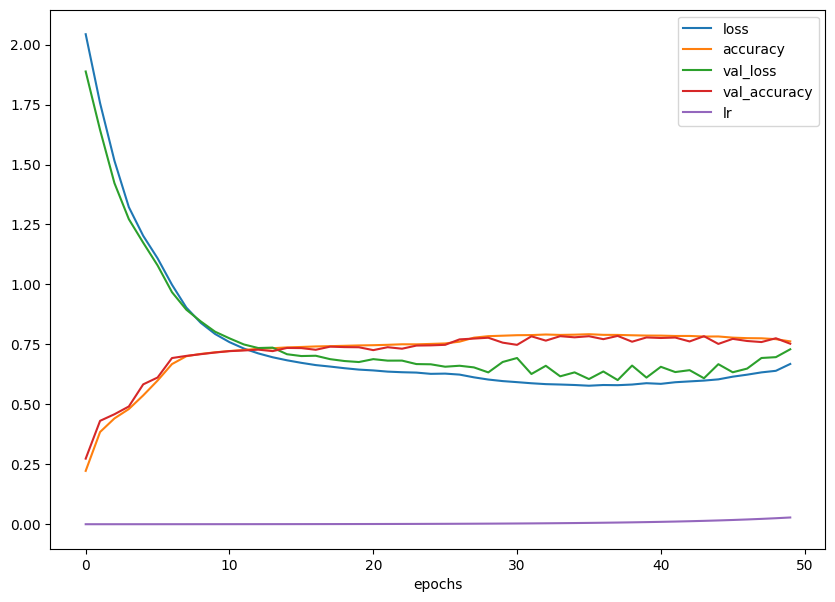

In [26]:
pd.DataFrame(history_3.history).plot(figsize=(10,7), xlabel="epochs");

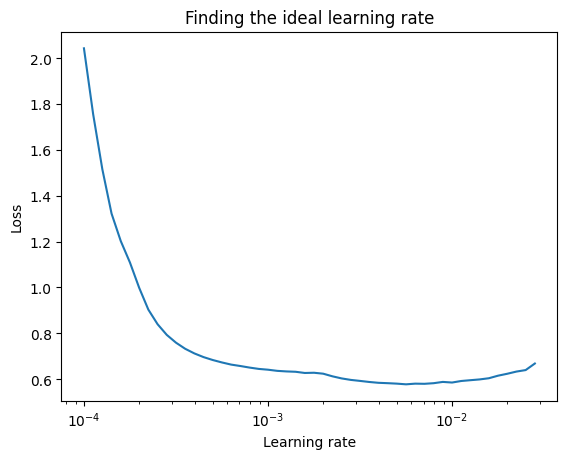

In [27]:
lrs = 1e-4 * (10**(np.arange(50)/20))
plt.semilogx(lrs, history_3.history["loss"]) # want the x-axis to be log-scale
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");

In [28]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])

#lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

history_3 = model_3.fit(train_data,
                        train_labels,
                        epochs=50,
                        validation_data=(test_data, test_labels))

Epoch 1/50
1875/1875 [==============================] - 6s 3ms/step - loss: 1.3663 - accuracy: 0.5491 - val_loss: 0.9499 - val_accuracy: 0.7119
Epoch 2/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8493 - accuracy: 0.7264 - val_loss: 0.8168 - val_accuracy: 0.7312
Epoch 3/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7568 - accuracy: 0.7401 - val_loss: 0.7535 - val_accuracy: 0.7357
Epoch 4/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7181 - accuracy: 0.7469 - val_loss: 0.7309 - val_accuracy: 0.7402
Epoch 5/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6939 - accuracy: 0.7525 - val_loss: 0.7238 - val_accuracy: 0.7505
Epoch 6/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6758 - accuracy: 0.7585 - val_loss: 0.7176 - val_accuracy: 0.7490
Epoch 7/50
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6631 - accuracy: 0.7632 - val_loss: 0.7010 - val_accuracy: